In [13]:
import numpy as np
from pyqubo import Spin
from pyqubo import Array
import neal
import networkx as nx
import matplotlib.pyplot as plt
import math 
import random
from collections import Counter

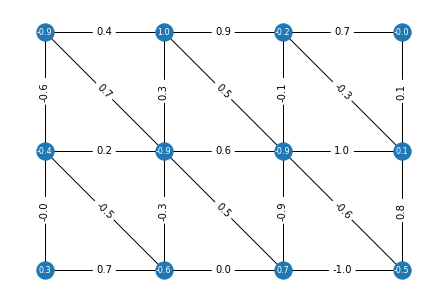

In [14]:
N = 12

Nx = 3
Ny = 4

G = nx.Graph()

Linears = np.zeros(N)
Quadratics = np.zeros((N,N))

for i in range(N):
    x = int(i/Nx)
    y = int(i%Nx)
    Linears[i] = round(random.uniform(-1,1),1)
    G.add_node(i,desc=str(Linears[i]),pos=(x,y))    

pos=nx.get_node_attributes(G,'pos')
    
for i in range(N):
    xi = int(i/Nx)
    yi = int(i%Nx)
    for j in range(i+1,N):
        xj = int(j/Nx)
        yj = int(j%Nx)
        if(xi==xj+1 and yi==yj or
           xi==xj-1 and yi==yj or
           yi==yj+1 and xi==xj or
           yi==yj-1 and xi==xj or
           yi==yj+1 and xi==xj-1):
            Quadratics[i][j] = round(random.uniform(-1,1),1)
            G.add_edge(i,j,name=str(Quadratics[i][j]))
            
nx.draw(G, pos)
node_labels = nx.get_node_attributes(G, 'desc')
nx.draw_networkx_labels(G, pos, labels=node_labels,font_color='w',font_size=8)
edge_labels = nx.get_edge_attributes(G, 'name')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [15]:
s = Array.create('s', shape=N, vartype='SPIN')
H = 0;

A = np.zeros(N)
B = np.zeros((N,N))

for i in range(N):
    A[i] = Linears[i]
    for j in range(i+1,N):
        B[i][j] = Quadratics[i][j]

for i in range(N):
    H = H + A[i]*s[i];
    for j in range(i+1,N):
        H = H + B[i][j]*s[i]*s[j];

model = H.compile()
ising = model.to_ising()

In [16]:
sa = neal.SimulatedAnnealingSampler()
sampleset = sa.sample_ising(ising[0],ising[1], num_reads=100)
decoded_samples = model.decode_sampleset(sampleset)
best_sample = min(decoded_samples, key=lambda x: x.energy)
print(best_sample.sample);

{'s[2]': 1, 's[1]': 1, 's[11]': -1, 's[3]': 1, 's[8]': 1, 's[10]': -1, 's[9]': 1, 's[4]': -1, 's[7]': 1, 's[5]': -1, 's[0]': -1, 's[6]': 1}


In [17]:
sols=[]
for samp in decoded_samples:
    res=[]
    for i in range(N):
        key='s['+str(i)+']';
        res.append(samp.sample[key])
    sols.append(res)

In [18]:
sol=[]
for i in range(N):
    key='s['+str(i)+']';
    sol.append(best_sample.sample[key])
print(sol)

[-1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1]


In [12]:
vals=[]
for ssol in sols:
    Hs = 0;

    for i in range(N):
        Hs = Hs + A[i]*ssol[i];
        for j in range(i+1,N):
            Hs = Hs + B[i][j]*ssol[i]*ssol[j];
        
    vals.append(Hs)

histogram = Counter(vals)
print(histogram)


Hs = 0;

for i in range(N):
    Hs = Hs + A[i]*sol[i];
    for j in range(i+1,N):
        Hs = Hs + B[i][j]*sol[i]*sol[j];
        
print(Hs)

Counter({-9.599999999999998: 74, -9.0: 13, -9.200000000000001: 9, -9.000000000000004: 4})
-9.599999999999998
